# Hard-core model 
## on small square lattice

In [204]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.animation as animation
from IPython.display import HTML
# set up default figure
plt.rcParams['figure.dpi'] = 300
plt.rcParams["animation.html"] = "jshtml"


Set up the model:

In [205]:
def neighbours_occupied(lattice_point, lattice):
    """
    Given a lattice point and a lattice, return 1 if any of the neighbours are occupied, 0 otherwise.

    Parameters
    ----------
    lattice_point : tuple
        A tuple containing the x and y coordinates of the lattice point.
    lattice : numpy.ndarray
        A 2D numpy array representing the lattice.

    Returns
    -------
    int
        1 if any of the neighbours are occupied, 0 otherwise.
    """
    
    x = lattice_point[0]
    y = lattice_point[1]
    # pad the lattice with zeros
    padded_lattice = np.pad(lattice, 1, 'constant', constant_values=0)
    # get the neighbours (only top, bottom, left, right; not diagonal)
    neighbours = [padded_lattice[x+1,y], padded_lattice[x-1,y], padded_lattice[x,y+1], padded_lattice[x,y-1]]
    # return 1 if any of the neighbours are 1, 0 otherwise
    return 1 if sum(neighbours) > 0 else 0



In [206]:
def draw_point(lattice):
    """
    Pick a random lattice point and return its coordinates.

    Parameters
    ----------
    lattice : numpy.ndarray
        A 2D numpy array representing the lattice.

    Returns
    -------
    tuple
        A tuple containing the x and y coordinates of the lattice point.
    """

    n_lattice = lattice.shape[0]
    x = np.random.randint(0, n_lattice)
    y = np.random.randint(0, n_lattice)
    return (x, y)

def check_acceptance(lattice, lattice_point):
    """
    Check whether a lattice point is accepted or not.

    Parameters
    ----------
    lattice : numpy.ndarray
        A 2D numpy array representing the lattice.
    lattice_point : tuple
        A tuple containing the x and y coordinates of the lattice point.

    Returns
    -------
    bool
        True if the lattice point is accepted, False otherwise.
    """

    x = lattice_point[0]
    y = lattice_point[1]
    coin = np.random.rand()
    if coin < 0.5 and neighbours_occupied((x,y), lattice) == 0:
        return True
    else:
        return False

Animation below:

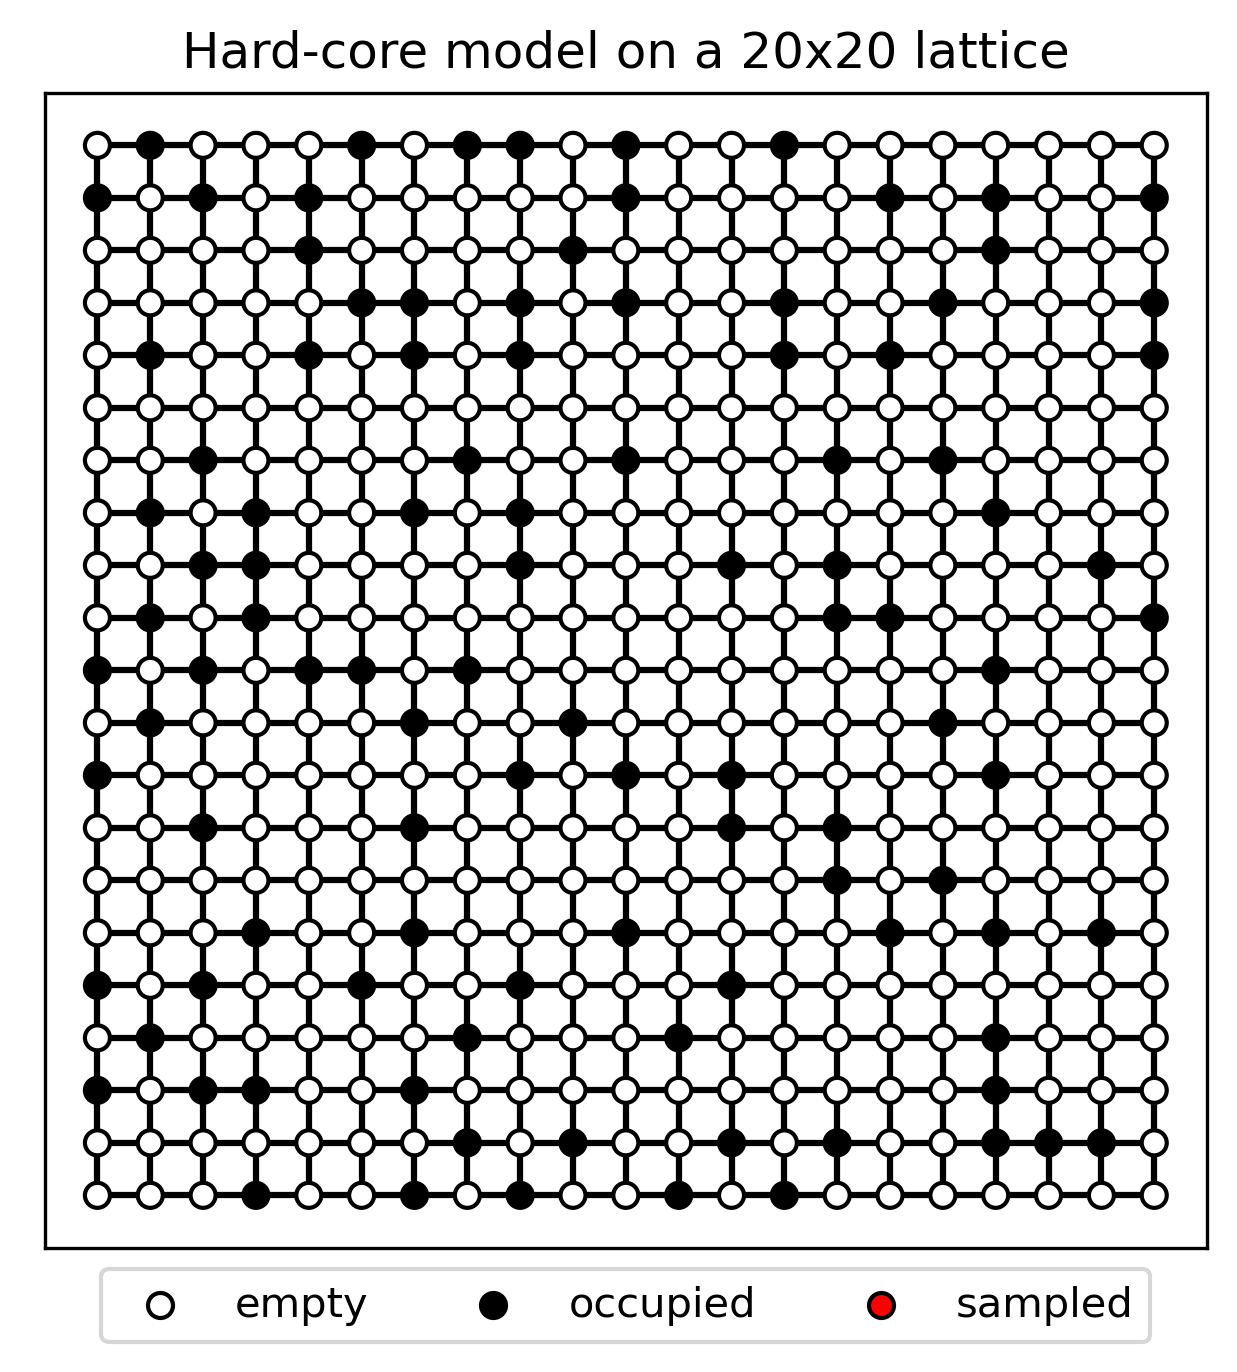

In [215]:
N_points = 20+1 # number of points in the lattice, plus one to account for the boundaries. Can be changed

lattice = np.zeros((N_points, N_points))
fig, ax = plt.subplots(figsize=(5,5))
cmap = colors.ListedColormap(['white', 'black', 'red']) # colors
bounds=[0,0.5,1.5,2.5] # bounds for the colors
norm = colors.BoundaryNorm(bounds, cmap.N) # colors
n_lattice = lattice.shape[0] # number of points in the lattice
x = np.arange(-n_lattice//2+1, n_lattice//2+1) # grid of points
y = np.arange(-n_lattice//2+1, n_lattice//2+1) # grid of points
X, Y = np.meshgrid(x, y) # grid of points
ax.hlines(y, xmin=-n_lattice//2+1, xmax=n_lattice//2, color='black') # edges between vertices
ax.vlines(x, ymin=-n_lattice//2+1, ymax=n_lattice//2, color='black') # edges between vertices
ax.scatter([], [], c='white', edgecolors="black", label='empty') # legend
ax.scatter([], [], c='black', edgecolors="black", label='occupied') # legend
ax.scatter([], [], c='red', edgecolors="black", label='sampled') # legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0), ncol=3) # legend

lattice_plot = ax.scatter(X, Y, c=lattice, zorder=2, cmap=cmap, norm=norm, edgecolors= "black") # initial lattice plot
ax.set_xticks([]) # remove ticks
ax.set_yticks([]) # remove ticks
ax.set_title("Hard-core model on a {n}x{n} lattice".format(n=n_lattice-1)) # title

def update(frame):
    """
    Update the lattice. If frame contains a 2, check if it is accepted. If it is, set it to 1. If it is not, set it back to 0.
    If frame does not contain a 2, pick a random lattice point and set it to 2.

    Parameters
    ----------
    frame : int
        The frame number.

    Returns
    -------
    matplotlib.collections.PathCollection
        The updated lattice plot.
    """

    if 2 not in lattice:
        lattice_point = draw_point(lattice) # pick a point
        lattice[lattice_point[0], lattice_point[1]] = 2 # set it to 2
    else:
        lattice_point = np.where(lattice == 2)
        lattice_point = (lattice_point[0][0], lattice_point[1][0])
        accepted = check_acceptance(lattice, lattice_point) # check if the point is accepted
        if accepted:
            # if accepted, set the point to 1
            lattice[lattice_point[0], lattice_point[1]] = 1
        else:
            # if not accepted, set the point back to 0
            lattice[lattice_point[0], lattice_point[1]] = 0

    # set the cmap and norm
    lattice_plot.set_norm(norm)
    lattice_plot.set_cmap(cmap)
    # update the plot
    lattice_plot.set_array(lattice.ravel())

    return (lattice_plot)

# animate
ani = animation.FuncAnimation(fig=fig, func=update, frames=1000, interval=100, blit=False)
HTML(ani.to_html5_video())